<p style="padding-top: 3cm;"></p>
<h2 align="center" style=font-size:30px;><font color="gray">IEEE BIG DATA 2020 - TUTORIAL 6 (Demo B)</font></h2> 
<h2 align="center" style=font-size:40px;><font color="orange">MVTS-Data Toolkit</font></h2> 
<h2 align="center" style=font-size:30px;>A Python Package for Pre-processing Multivariate Time Series Data</h2> 

<div style="text-align:center">
<img src="https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/MVTS_Data_Toolkit_icon2.png" align="center;" style="width: 250px;">
</div>

    
<h3 align="center" style=font-size:25px;>Azim Ahmadzadeh<br />Dec 11, 2020</h3>
<p style="padding-bottom: 3cm;"></p>


<!--- for using MathJax --->
<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<link
  rel="stylesheet"
  href="https://cdnjs.cloudflare.com/ajax/libs/prism/1.5.0/themes/prism.min.css"
/>
<script src="https://cdnjs.cloudflare.com/ajax/libs/prism/1.5.0/prism.min.js"></script>

<!--- Style --->
<style>
.serif {
  font-family: "Times New Roman", Times, serif;
}

.sansserif {
  font-family: Arial, Helvetica, sans-serif;
}

.monospace {
  font-family: "Lucida Console", Courier, monospace;
}

.warning {
  color: "red";
}
</style>

<hr />

<h1 style=font-size:40px;><i class="fas fa-box-open"></i><font color="Grey"> Package: </font>MVTS-Data Toolkit</h1>

<p style="padding-bottom: 7cm;"></p>
<ul style="font-size:25px;">
    <li><font color="gray">Package: </font><a href="https://pypi.org/project/mvtsdatatoolkit/">mvtsdatatoolkit 0.2.6</a> (PyPI)</li>
    <li><font color="gray">Documentation: </font><a href="https://dmlab.cs.gsu.edu/docs/mvtsdata_toolkit/mvtsdatatoolkit.html">dmlab.cs.gsu.edu/docs/mvtsdata_toolkit/</a></li>
    <li><font color="gray">Journal: </font><a href="https://www.journals.elsevier.com/softwarex">SoftwareX</a> (Esleview)</li>
    <li><font color="gray">Paper: </font>MVTS Data Toolkit: A Toolkit for Pre-processing Multivariate Time Series Data (2020) <a href="https://www.sciencedirect.com/science/article/pii/S2352711020300157"><i class="fas fa-file-pdf"></i></a></li>
    <li><font color="gray">Authors: </font><i>Azim Ahmadzadeh</i> <a href="https://www.azim-a.com"><i class="fas fa-user"></i></a>, <i>Kankana Sinha</i> <a href="https://www.linkedin.com/in/kankana-sinha-4b4b13131/"><i class="fas fa-user"></i></a>, <i>Berkay Aydin</i> <a href="https://grid.cs.gsu.edu/~baydin2/"><i class="fas fa-user"></i></a>, <i>Rafal A. Angryk</i> <a href="https://grid.cs.gsu.edu/~rangryk/"><i class="fas fa-user"></i></a></li>
</ul>
<p style="padding-bottom: 5cm;"></p>
<hr />

<h1 style=font-size:40px;><i class="fas fa-th-list"></i><font color="Grey"> Outline of Demo</font></h1>

<p style="padding-bottom: 6cm;"></p>
<ol style="font-size:25px;">
    <li><font color="orange">Data: </font>Download a subset of SWAN-SF benchmark dataset (2000 mvts).</li>
    <li><font color="orange">Configuration: </font>Set up the configuration file of the package.</li>
    <li><font color="orange">Analysis of Data: </font>Get some basic statistics about the data.</li>
    <li><font color="orange">Feature Extraction: </font>Extract the statistical features from the mvts instances.</li>
    <li><font color="orange">Visualization: </font>Visualize the extracted features.
    <li><font color="orange">Analysis of EF: </font>Analyze the extracted-feature data.</li>
    <li><font color="orange">Normalization: </font>Normalize the extracted features.</li>
    <li><font color="orange">Sampling: </font>Sample the extracted data to obtain a different ratios of the five classes.</li>
</ol>
<p style="padding-bottom: 4cm;"></p>
<hr />

<p style="font-size:18px;">
    First, you need to install <code>mvtsdatatoolkit</code> using <code>pip</code>. The packages was tested with <code>Python 3.6</code>.
</p>

In [ ]:
# !pip install mvtsdatatoolkit

In [1]:
import urllib.request
from mvtsdatatoolkit.data.data_retriever import DataRetriever  # for downloading data
%matplotlib inline

<h1 style=font-size:40px;><i class="fas fa-cloud-download-alt"></i><font color="Grey"> Download Data</font></h1>

<p style="font-size:25px;">
    In this demo I use a subset of SWAN-SF benchmark dataset. In the following cells, it will be automatically downloaded. This pet-dataset will be downloaded from <a href="https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip">here</a>. The original data is also available <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EBCFKM">here</a>.
</p>

In [2]:
dr = DataRetriever(1)
dr.print_info()

URL:		https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip
NAME:		petdataset_01.zip
TYPE:		application/zip
SIZE:		32M


<p style="font-size:25px;">
    Ready to download? This may take a few seconds, depending on your internet bandwidth. Wait for the progress bar.
</p>

In [3]:
where_to = './temp/'  # Don't change this path.
dr.retrieve(target_path = where_to)

Extracting: 100%|██████████| 2001/2001 [00:01<00:00, 1896.19it/s]


<p style="font-size:25px;">
    OK. Let's see how many files are available to us now.
</p>

In [4]:
dr.get_total_number_of_files()

2000

<hr />

<h1 style=font-size:40px;><i class="fas fa-sliders-h"></i><font color="Grey"> Configuration File</font></h1>

<p style="font-size:25px;">
    Having the configuration file set up makes things easier. So, let's see what can be done using this file.
</p>

<p style="font-size:25px;">
    Here is a short example of a configuration file, which is a <font color="orange">YAML</font> file.
</p>



<a>
    <img src="../figures/configuration_screenshot.png" align="center" style="width: 500px;"></img>
</a>

<ul style="font-size:25px;">
    <li><code>PATH_to_MVTS</code>: Path to data.</li>
    <li><code>PATH_TO_EXTRACTED</code>: Path to the extracted-feature data.</li>
    <li><code>META_DATA_TAGS</code>: A list of tags to be used for extracting metadata encoded into the filenames.</li>
    <li><code>MVTS_PARAMETERS</code>: A list of parameter names from all parameters given in the dataset.</li>
    <li><code>STATISTICAL_FEATURES</code>: A list of statistical features of interest to be extracted from the multivariate time series.</li>
</ul>


<p style="padding-bottom: 1cm;"></p>
<hr />

<h1 style=font-size:40px;><i class="fas fa-sliders-h"></i><font color="Grey"> Configuration File</font></h1>

<p style="font-size:25px;">
    Let's see how <code>META_DATA_TAGS</code> can be used.
</p>

<p style="padding-bottom: 3cm;"></p>
<p style="font-size:30px;">
    For example:
</p>
<ul style="font-size:25px;">
    <li><font color='orange'>File name</font>:<code>mvts_st[YYYY-MM-DDTHH:MM:SS].csv</code>: <code>st</code> can be used to extract the timestamp.</li>
</ul>

<p style="font-size:30px;">
    In SWAN-SF dataset:
</p>
<ul style="font-size:25px;">
    <li><font color='orange'>File name</font>:<code>lab[B]6.0@7473_id[3648]_st[2014-01-23T15:12:00]_et[2014-01-24T03:00:00].csv</code>: There are 4 tags; <code>id, lab, st,</code> and <code>et</code></li>
</ul>

<p style="padding-bottom: 3cm;"></p>
<hr />

<h1 style=font-size:40px;><i class="fas fa-sliders-h"></i><font color="Grey"> Configuration File</font></h1>

<p style="font-size:25px;">
    We can quickly download a proper configuration file for the purpose of this demo.
</p>

In [5]:
conf_url = 'https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/demo_configs.yml'
path_to_config = './demo_configs.yml'
urllib.request.urlretrieve(conf_url, path_to_config)

('./demo_configs.yml', <http.client.HTTPMessage at 0x7f3d4cc342b0>)

<p style="font-size:25px;">
    Let's take a look at the content of the config file which is located at <code>'./demo_configs.yml'</code>:
</p>

In [6]:
with open(path_to_config, 'r') as f:
    print(f.read())

PATH_TO_MVTS: './temp/petdataset_01/'
PATH_TO_EXTRACTED_FEATURES: './temp/extracted_features/'
META_DATA_TAGS: ['id', 'lab', 'st', 'et']
MVTS_PARAMETERS:
  - 'TOTUSJH'
  - 'TOTBSQ'
  - 'TOTPOT'
  - 'TOTUSJZ'
  - 'ABSNJZH'
  - 'SAVNCPP'
  - 'USFLUX'
  - 'TOTFZ'
  - 'MEANPOT'
  - 'EPSZ'
  - 'MEANSHR'
  - 'SHRGT45'
  - 'MEANGAM'
  - 'MEANGBT'
  - 'MEANGBZ'
  - 'MEANGBH'
  - 'MEANJZH'
  - 'TOTFY'
  - 'MEANJZD'
  - 'MEANALP'
  - 'TOTFX'
  - 'EPSY'
  - 'EPSX'
  - 'R_VALUE'
STATISTICAL_FEATURES:
  - 'get_min'
  - 'get_max'
  - 'get_median'
  - 'get_mean'
  - 'get_stddev'
  - 'get_var'
  - 'get_skewness'
  - 'get_kurtosis'
  - 'get_no_local_maxima'
  - 'get_no_local_minima'
  - 'get_no_local_extrema'
  - 'get_no_zero_crossings'
  - 'get_mean_local_maxima_value'
  - 'get_mean_local_minima_value'
  - 'get_no_mean_local_maxima_upsurges'
  - 'get_no_mean_local_minima_downslides'
  - 'get_difference_of_mins'
  - 'get_difference_of_maxs'
  - 'get_difference_of_means'
  - 'get_difference_of_stds'
  -

<hr />

<h1 style=font-size:40px;><i class="fas fa-chart-line"></i><font color="Grey"> Analysis of Raw Data</font></h1>

<p style="font-size:25px;">
    Using <code>MVTSDataAnslysis</code> module users can get an idea of the dataset they are going to work on.
</p>

In [7]:
from mvtsdatatoolkit.data_analysis.mvts_data_analysis import MVTSDataAnalysis

mvda = MVTSDataAnalysis(path_to_config)
mvda.print_stat_of_directory()

----------------------------------------
Directory:			./temp/petdataset_01/
Total no. of files:	2000
Total size:			76M
Total average:		38K
----------------------------------------


<p style="font-size:25px;">
    Get a summary statistics of the data.
</p>

In [8]:
params = ['TOTUSJH', 'TOTBSQ', 'TOTPOT']
n = 50
mvda.compute_summary(params_name=params, first_k=n)
mvda.summary

Parameter-Name Val-Count Null-Count          mean           min  \
0        TOTUSJH      2999          1  9.885506e+02  1.793738e+00   
1         TOTBSQ      2999          1  1.439269e+10  1.002753e+07   
2         TOTPOT      2999          1  2.410621e+23  2.211212e+19   

           25th          50th          75th           max  
0  3.480066e+01  3.059212e+02  1.465246e+03  8.722342e+03  
1  2.362172e+08  3.211214e+09  1.795166e+10  1.191524e+11  
2  1.646464e+21  2.756960e+22  2.572338e+23  2.393389e+24

<p style="font-size:25px;">
    ... which says the length of the time series, across the 50 mvts files is 3000, including 1 <code>NA/NAN</code> values. In addition, <code>mean</code>, <code>min</code>, <code>max</code>, and three quantiles are calculated for each time series.
</p>

<hr/>

<h1 style=font-size:40px;><i class="fas fa-chart-line"></i><font color="Grey"> Analysis of Raw Data</font> + <font color="orange">  Large Data</font></h1>

<ul style="font-size:25px;">
    <li>The <font color="orange">parallel</font> version of <code>compute_summary</code> is also implemented for larger datasets. As shown below, we can use multiple processes to compute the summary statistics.</li>
</ul>
<p style="padding-bottom: 2cm;"></p>

In [9]:
mvda.compute_summary_in_parallel(n_jobs=4, first_k=n, verbose=False, params_name=params)
mvda.summary

Parameter-Name Val-Count Null-Count          mean           min  \
0        TOTUSJH      2999          1  9.850888e+02  1.793738e+00   
1         TOTBSQ      2999          1  1.433840e+10  1.002753e+07   
2         TOTPOT      2999          1  2.396001e+23  2.211212e+19   

           25th          50th          75th           max  
0  3.475790e+01  3.062993e+02  1.466880e+03  8.722342e+03  
1  2.358623e+08  3.186072e+09  1.766345e+10  1.191524e+11  
2  1.645149e+21  2.756104e+22  2.575798e+23  2.393389e+24

<p style="padding-bottom: 1cm;"></p>
<p style="font-size:25px;">
    <font color="orange"><i class="fas fa-arrow-right"></i></font> Notes:
</p>

<ul style="font-size:25px;">
    <li>To compute percentiles on distributed data we rely on the <font color="orange">t-digest</font> data structure. The t-Digest is a probabilistic data structure for estimating the percentiles from either distributed data or streaming data. [<a href="https://github.com/tdunning/t-digest/blob/master/docs/t-digest-paper/histo.pdf"><i class="fas fa-file-pdf"></i></a>, <a href="https://github.com/CamDavidsonPilon/tdigest"><i class="fab fa-github"></i></a>].</li>
</ul>


<p style="padding-bottom: 2cm;"></p>
<hr />

<h1 style=font-size:40px;><i class="fas fa-bong"></i><font color="Grey"> Feature Extraction</font></h1>

<p style="font-size:25px;">
    A list of <font color="orange">40+ statistical features</font> are implemented in <code>feature_collection</code>. Let's take a look at them.
</p>

In [10]:
import mvtsdatatoolkit.features.feature_collection as fc
help(fc)

Help on module mvtsdatatoolkit.features.feature_collection in mvtsdatatoolkit.features:

NAME
    mvtsdatatoolkit.features.feature_collection

FUNCTIONS
    get_average_absolute_change(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average absolute first difference of a univariate time series.
    
    get_average_absolute_derivative_change(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average absolute first difference of a derivative of univariate time series.
    
    get_avg_mono_decrease_slope(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average slope of monotonically decreasing segments.
    
    get_avg_mono_increase_slope(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average slope of monotonically increasing segments.
    
    get_dderivative_kurtosis(uni_ts:Union[pandas.core.series.Series,

<p style="padding-bottom: 3cm;"></p>

<p style="font-size:25px;">
    For more on this, see the documentation <a href="https://dmlab.cs.gsu.edu/docs/mvtsdata_toolkit/mvtsdatatoolkit.features.html#module-mvtsdatatoolkit.features.feature_collection">here</a> and the source code therein.
</p>

<p style="padding-bottom: 2cm;"></p>
<hr/>

<h1 style=font-size:40px;><i class="fas fa-bong"></i><font color="Grey"> Feature Extraction</font> + <font color="orange">Example</font></h1>

<p style="font-size:25px;">
    <b>Example: </b> Let's extract 3 simple statistical features, namely <code>min</code>, <code>max</code>, and <code>median</code>, from 3 parameters, such as <code>TOTUSJH</code>, <code>TOTBSQ</code>, and <code>TOTPOT</code>.
</p>

In [11]:
from mvtsdatatoolkit.features.feature_extractor import FeatureExtractor

fe = FeatureExtractor(path_to_config)
fe.do_extraction(features_name=['get_min', 'get_max', 'get_median'],
                 params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'], first_k=50)
fe.df_all_features

id lab                   st                   et  TOTUSJH_min  \
0   3405  NF  2013-11-22T21:12:00  2013-11-23T09:00:00    17.522880   
1   3396  NF  2013-11-20T09:24:00  2013-11-20T21:12:00   280.852180   
2   3341   C  2013-11-12T16:12:00  2013-11-13T04:00:00  2462.151965   
3   3551  NF  2013-12-28T23:12:00  2013-12-29T11:00:00   262.821754   
4   3686   M  2014-02-06T02:00:00  2014-02-06T13:48:00  7849.455657   
5   3535   C  2013-12-26T19:48:00  2013-12-27T07:36:00  1113.167991   
6   3401  NF  2013-11-20T01:00:00  2013-11-20T12:48:00    38.395842   
7   3503  NF  2013-12-15T02:36:00  2013-12-15T14:24:00    41.840296   
8   3784   C  2014-03-04T18:36:00  2014-03-05T06:24:00  2063.304718   
9   3344  NF  2013-11-02T20:36:00  2013-11-03T08:24:00    16.906028   
10  3432  NF  2013-11-26T20:36:00  2013-11-27T08:24:00   304.613137   
11  3448  NF  2013-12-01T00:24:00  2013-12-01T12:12:00   364.612035   
12  3497  NF  2013-12-17T20:24:00  2013-12-18T08:12:00  1676.119436   
13  3385  NF  2013-11-20T01:36:00  2013-11-20T13:24:00    75.546837   
14  3480  NF  2013-12-11T10:36:00  2013-12-11T22:24:00     8.707079   
15  3367  NF  2013-11-14T07:24:00  2013-11-14T19:12:00   161.660124   
16  3353  NF  2013-11-11T08:48:00  2013-11-11T20:36:00    15.175155   
17  3376  NF  2013-11-20T21:00:00  2013-11-21T08:48:00  2681.173425   
18  3793   C  2014-02-26T00:00:00  2014-02-26T11:48:00  2440.751243   
19  3379  NF  2013-11-12T15:00:00  2013-11-13T02:48:00     1.793738   
20  3441  NF  2013-11-27T19:48:00  2013-11-28T07:36:00    74.039773   
21  3376   C  2013-11-16T07:00:00  2013-11-16T18:48:00  3012.485906   
22  3578  NF  2014-01-05T22:36:00  2014-01-06T10:24:00    10.180090   
23  3446  NF  2013-11-30T14:36:00  2013-12-01T02:24:00   218.277640   
24  3336  NF  2013-11-02T11:48:00  2013-11-02T23:36:00    94.900407   
25  3268  NF  2013-10-11T23:36:00  2013-10-12T11:24:00     9.667267   
26  3601  NF  2014-01-13T20:24:00  2014-01-14T08:12:00   642.926218   
27  3321   C  2013-10-27T19:00:00  2013-10-28T06:48:00  1502.537628   
28  3503  NF  2013-12-19T10:36:00  2013-12-19T22:24:00    14.066452   
29  3473  NF  2013-12-17T18:24:00  2013-12-18T06:12:00  2679.609524   
30  3419  NF  2013-11-23T02:36:00  2013-11-23T14:24:00     9.960243   
31  3366   C  2013-11-17T03:12:00  2013-11-17T15:00:00  2722.460886   
32  3879   C  2014-03-23T07:48:00  2014-03-23T19:36:00  1376.905977   
33  3561  NF  2014-01-02T20:12:00  2014-01-03T08:00:00    35.395374   
34  3447  NF  2013-12-03T11:24:00  2013-12-03T23:12:00    23.214890   
35  3515  NF  2013-12-20T05:24:00  2013-12-20T17:12:00   475.294739   
36  3813   C  2014-03-08T18:24:00  2014-03-09T06:12:00   844.279803   
37  3503  NF  2013-12-16T22:36:00  2013-12-17T10:24:00    15.902090   
38  3648   B  2014-01-23T10:12:00  2014-01-23T22:00:00  1217.166042   
39  3407  NF  2013-11-21T23:36:00  2013-11-22T11:24:00     8.553492   
40  3309  NF  2013-10-31T13:36:00  2013-11-01T01:24:00    87.330338   
41  3719   C  2014-02-09T21:12:00  2014-02-10T09:00:00   599.132169   
42  3376  NF  2013-11-15T03:00:00  2013-11-15T14:48:00  3268.283001   
43  3344   C  2013-11-06T19:36:00  2013-11-07T07:24:00   399.369856   
44  3457  NF  2013-12-03T23:36:00  2013-12-04T11:24:00   774.771915   
45  3558  NF  2013-12-31T20:00:00  2014-01-01T07:48:00    28.816959   
46  3321   C  2013-10-28T11:00:00  2013-10-28T22:48:00  1932.745024   
47  3364   C  2013-11-09T00:24:00  2013-11-09T12:12:00   619.818638   
48  3371  NF  2013-11-11T05:12:00  2013-11-11T17:00:00    19.961592   
49  3513  NF  2013-12-22T13:24:00  2013-12-23T01:12:00   128.257933   

    TOTUSJH_max  TOTUSJH_median    TOTBSQ_min    TOTBSQ_max  TOTBSQ_median  \
0     27.969753       21.329001  1.363008e+08  2.134559e+08   1.706190e+08   
1    338.941312      307.486615  1.929732e+09  2.329104e+09   2.077430e+09   
2   2815.348641     2724.360168  3.599412e+10  4.027288e+10   3.852798e+10   
3    317.268144      290.908828  3.148155e+09  3.963436e+09   3.446422e+

<p style="padding-bottom: 4cm;"></p>
<hr/>

<h1 style=font-size:40px;><i class="fas fa-chart-pie"></i><font color="Grey"> Feature Extraction</font> + <font color="orange">Vis</font></h1>

<p style="font-size:25px;">
    There are multiple visualization functions (utilizing the <a href="https://seaborn.pydata.org/#:~:text=Seaborn%20is%20a%20Python%20data,can%20read%20the%20introductory%20notes.">seaborn</a> library) incorporated in this package that are called in the <code>FeatureExtractor</code> class. Here are some examples:
</p>


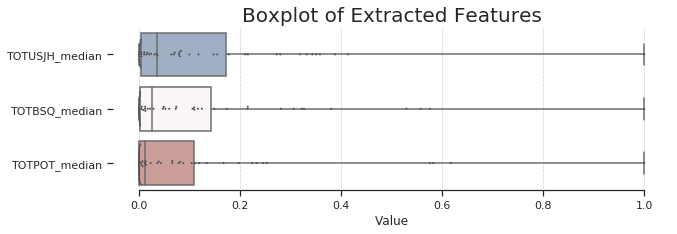

In [12]:
fe.plot_boxplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

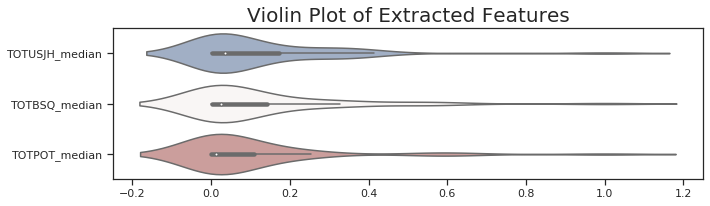

In [13]:
fe.plot_violinplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

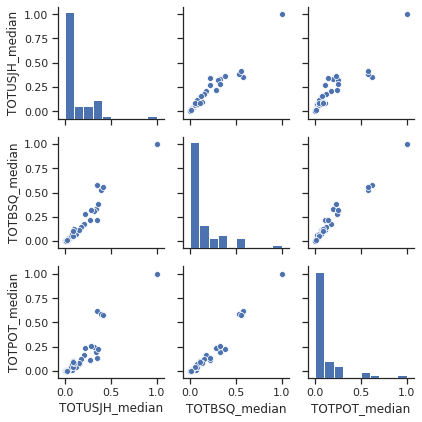

In [14]:
fe.plot_splom(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

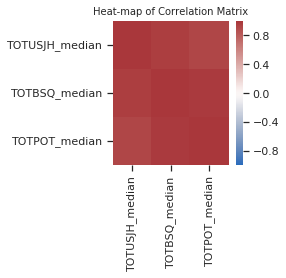

In [15]:
fe.plot_correlation_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

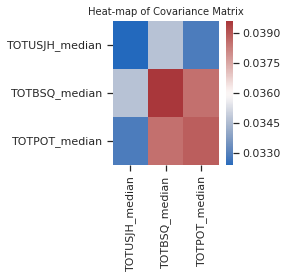

In [16]:
fe.plot_covariance_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

<p style="padding-bottom: 1cm;"></p>

<p style="font-size:30px;">
    <font color="orange"><i class="fas fa-arrow-right"></i></font> Notes:
</p>

<ul style="font-size:25px;">
    <li>In all these plots, the extracted features are automatically normalized.</li>
    <li>To avoid normalization, use the <code>visualizatios.StatVisualizer</code> directly, and set the argument <code>normalize = False</code>.</li>
    <li>To store the plots, use the optional argument <code>output_path</code> to the desired path. If it is not set to <code>None</code>, it will store the plot instead of showing it.</li>
</ul>

<hr/>

<h1 style=font-size:40px;><i class="fas fa-database"></i><font color="Grey"> Feature Extraction</font> + <font color="orange"> Large Data</font></h1>

<ul style="font-size:25px;">
    <li>For larger datasets, we implemented the <font color="orange">parallel</font> version of <code>do_extraction</code>.</li>
</ul>

<p style="font-size:25px;">
    This time we work on all 2000 mvts files, not just the first 50! This is <font color="orange">40 times larger</font> but it takes only <font color="orange">10 times longer</font> (40 times / 4 jobs) than the sequential version.
</p>

In [17]:
fe.do_extraction_in_parallel(n_jobs=4,
                             features_name=['get_min', 'get_max', 'get_median'],
                             params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'])
fe.df_all_features

id lab                   st                   et  TOTUSJH_min  \
0     3334  NF  2013-11-04T21:00:00  2013-11-05T08:48:00     7.132531   
1     3686   C  2014-02-07T10:00:00  2014-02-07T21:48:00  6617.362768   
2     3336   C  2013-11-01T13:48:00  2013-11-02T01:36:00    20.425692   
3     3415   C  2013-12-03T09:00:00  2013-12-03T20:48:00   795.419369   
4     3686   M  2014-02-03T17:00:00  2014-02-04T04:48:00  9426.113043   
5     3856   C  2014-03-24T12:24:00  2014-03-25T00:12:00  2249.213281   
6     3420  NF  2013-11-28T04:24:00  2013-11-28T16:12:00   142.287659   
7     3343  NF  2013-11-03T18:36:00  2013-11-04T06:24:00     2.728677   
8     3330  NF  2013-11-03T10:48:00  2013-11-03T22:36:00   343.801157   
9     3334  NF  2013-11-06T21:00:00  2013-11-07T08:48:00     2.271698   
10    3590  NF  2014-01-09T04:12:00  2014-01-09T16:00:00     8.201594   
11    3309  NF  2013-10-27T22:36:00  2013-10-28T10:24:00    52.070208   
12    3532  NF  2013-12-25T12:12:00  2013-12-26T00:00:00    26.878938   
13    3370  NF  2013-11-13T05:00:00  2013-11-13T16:48:00    23.224095   
14    3267  NF  2013-10-14T14:00:00  2013-10-15T01:48:00   310.260777   
15    3439  NF  2013-11-27T09:12:00  2013-11-27T21:00:00    36.615574   
16    3481  NF  2013-12-08T22:12:00  2013-12-09T10:00:00   163.709048   
17    3401  NF  2013-11-17T15:00:00  2013-11-18T02:48:00    25.014610   
18    3473   C  2013-12-11T19:24:00  2013-12-12T07:12:00  2492.309513   
19    3688   M  2014-02-02T20:00:00  2014-02-03T07:48:00  2049.844902   
20    3350  NF  2013-11-11T00:48:00  2013-11-11T12:36:00    13.876557   
21    3492  NF  2013-12-10T16:00:00  2013-12-11T03:48:00   116.555392   
22    3407  NF  2013-11-20T00:36:00  2013-11-20T12:24:00    36.775290   
23    3563   C  2014-01-11T06:00:00  2014-01-11T17:48:00  5063.032696   
24    3407  NF  2013-11-22T01:36:00  2013-11-22T13:24:00     8.553492   
25    3286  NF  2013-10-22T01:24:00  2013-10-22T13:12:00   151.551232   
26    3355  NF  2013-11-06T20:48:00  2013-11-07T08:36:00    19.252053   
27    3449  NF  2013-12-04T10:24:00  2013-12-04T22:12:00     3.714785   
28    3474  NF  2013-12-07T23:00:00  2013-12-08T10:48:00    51.399045   
29    3287  NF  2013-10-15T18:36:00  2013-10-16T06:24:00    57.484364   
...    ...  ..                  ...                  ...          ...   
1970  3580  NF  2014-01-04T22:00:00  2014-01-05T09:48:00   403.309930   
1971  3265  NF  2013-10-08T12:36:00  2013-10-09T00:24:00     9.809842   
1972  3595  NF  2014-01-13T21:24:00  2014-01-14T09:12:00    64.585300   
1973  3364   C  2013-11-14T00:24:00  2013-11-14T12:12:00  1169.741304   
1974  3856   C  2014-03-25T23:24:00  2014-03-26T11:12:00  1684.573276   
1975  3353  NF  2013-11-08T01:48:00  2013-11-08T13:36:00    64.474459   
1976  3686   C  2014-02-07T06:00:00  2014-02-07T17:48:00  6783.768133   
1977  3448  NF  2013-12-08T10:24:00  2013-12-08T22:12:00  2143.743394   
1978  3879   C  2014-03-21T13:48:00  2014-03-22T01:36:00  1432.259352   
1979  3481  NF  2013-12-14T20:12:00  2013-12-15T08:00:00   488.838339   
1980  3474  NF  2013-12-11T17:00:00  2013-12-12T04:48:00    28.256982   
1981  3291   M  2013-10-23T06:48:00  2013-10-23T18:36:00  3772.822196   
1982  3436  NF  2013-11-30T02:36:00  2013-11-30T14:24:00    22.175756   
1983  3481  NF  2013-12-16T10:12:00  2013-12-16T22:00:00   346.357222   
1984  3367  NF  2013-11-13T08:24:00  2013-11-13T20:12:00   104.954696   
1985  3432  NF  2013-11-29T13:36:00  2013-11-30T01:24:00   709.377489   
1986  3385  NF  2013-11-18T14:36:00  2013-11-19T02:24:00   142.351572   
1987  3295  NF  2013-10-21T12:00:00  2013-10-21T23:48:00  2202.418567   
1988  3401  NF  2013-11-17T18:00:00  2013-11-18T05:48:00    25.014610   
1989  3439  NF  2013-12-01T05:12:00  2013-12-01T17:00:00    27.037881   
1990  3595  NF  2014-01-13T11:24:00  2014-01-13T23:12:00    59.663349   
1991  3423  NF  2013-11-22T22:36:00  2013-11-23T10:24:00    13.292438   
1992  3474  NF  2013-12-10T04:00:00  2013-12-10T15:48:00    44.774

<p style="padding-bottom: 4cm;"></p>
<hr/>

<h1 style=font-size:40px;><i class="fas fa-chart-bar"></i><font color="Grey"> Feature Extraction</font> + <font color="orange"> Analysis</font></h1>

<ul style="font-size:25px;">
    <li>For a quick view of the extracted features, the module <code>ExtractedFeaturesAnalysis</code> is implemented.</li>
</ul>

<p style="font-size:25px;">
    The extracted features can be easily summarized using descriptive statistics such as <code>meam</code>, <code>std</code>, <code>min</code>, and <code>max</code>, as well as the <i>first</i>, <i>second</i> and <i>third quartiles</i>. In addition, any missing value can also be spotted.
</p>

In [18]:
from mvtsdatatoolkit.data_analysis.extracted_features_analysis import ExtractedFeaturesAnalysis

efa = ExtractedFeaturesAnalysis(fe.df_all_features, exclude=['id'])
efa.compute_summary()
efa.summary

Feature-Name  Val-Count  Null-Count          mean           std  \
0     TOTUSJH_min     2000.0           0  8.012821e+02  1.427005e+03   
1     TOTUSJH_max     2000.0           0  9.534217e+02  1.610283e+03   
2  TOTUSJH_median     2000.0           0  8.678093e+02  1.501012e+03   
3      TOTBSQ_min     2000.0           0  1.156545e+10  2.196349e+10   
4      TOTBSQ_max     2000.0           0  1.297180e+10  2.372814e+10   
5   TOTBSQ_median     2000.0           0  1.226146e+10  2.286246e+10   
6      TOTPOT_min     2000.0           0  1.960882e+23  4.439333e+23   
7      TOTPOT_max     2000.0           0  2.894560e+23  2.289577e+24   
8   TOTPOT_median     2000.0           0  2.071366e+23  4.596827e+23   

            min          25th          50th          75th           max  
0  0.000000e+00  3.273820e+01  1.908205e+02  8.507221e+02  1.019574e+04  
1  3.994395e+00  5.781455e+01  2.742351e+02  1.065783e+03  1.152325e+04  
2  1.490241e+00  4.367289e+01  2.270971e+02  9.560433e+02  1.063433e+04  
3  0.000000e+00  2.644623e+08  1.859199e+09  1.160760e+10  1.354621e+11  
4  2.149169e+07  4.384896e+08  2.773385e+09  1.345348e+10  1.431918e+11  
5  8.785394e+06  3.580180e+08  2.249029e+09  1.253193e+10  1.413469e+11  
6  0.000000e+00  1.727556e+21  1.302453e+22  1.672474e+23  3.176636e+24  
7  1.085579e+20  3.153874e+21  2.161927e+22  1.954215e+23  8.101464e+25  
8  4.463689e+19  2.454831e+21  1.661687e+22  1.801092e+23  3.284844e+24

<p style="padding-bottom: 3cm;"></p>

<hr/>

<h1 style=font-size:40px;><i class="fas fa-circle-notch"></i><font color="orange"> Normalization</font> <font color="Grey">of Extracted Features</font></h1>

<p style="font-size:25px;">
    The extracted features can also be normalized using four different methods (inherited from <a href="https://scikit-learn.org/stable/modules/preprocessing.html">sklearn.preprocessing</a>):
</p>
<ul style="font-size:20px;">
    <li><code>zero_one_normalize</code></li>
    <li><code>negativeone_one_normalize</code></li>
    <li><code>standardize</code></li>
    <li><code>robust_standardize</code>
</ul>


In [19]:
from mvtsdatatoolkit.normalizing import normalizer

df_norm = normalizer.zero_one_normalize(df=fe.df_all_features, excluded_colnames=['id'])
df_norm

id lab                   st                   et  TOTUSJH_min  \
0     3334  NF  2013-11-04T21:00:00  2013-11-05T08:48:00     0.000700   
1     3686   C  2014-02-07T10:00:00  2014-02-07T21:48:00     0.649032   
2     3336   C  2013-11-01T13:48:00  2013-11-02T01:36:00     0.002003   
3     3415   C  2013-12-03T09:00:00  2013-12-03T20:48:00     0.078015   
4     3686   M  2014-02-03T17:00:00  2014-02-04T04:48:00     0.924515   
5     3856   C  2014-03-24T12:24:00  2014-03-25T00:12:00     0.220603   
6     3420  NF  2013-11-28T04:24:00  2013-11-28T16:12:00     0.013956   
7     3343  NF  2013-11-03T18:36:00  2013-11-04T06:24:00     0.000268   
8     3330  NF  2013-11-03T10:48:00  2013-11-03T22:36:00     0.033720   
9     3334  NF  2013-11-06T21:00:00  2013-11-07T08:48:00     0.000223   
10    3590  NF  2014-01-09T04:12:00  2014-01-09T16:00:00     0.000804   
11    3309  NF  2013-10-27T22:36:00  2013-10-28T10:24:00     0.005107   
12    3532  NF  2013-12-25T12:12:00  2013-12-26T00:00:00     0.002636   
13    3370  NF  2013-11-13T05:00:00  2013-11-13T16:48:00     0.002278   
14    3267  NF  2013-10-14T14:00:00  2013-10-15T01:48:00     0.030430   
15    3439  NF  2013-11-27T09:12:00  2013-11-27T21:00:00     0.003591   
16    3481  NF  2013-12-08T22:12:00  2013-12-09T10:00:00     0.016057   
17    3401  NF  2013-11-17T15:00:00  2013-11-18T02:48:00     0.002453   
18    3473   C  2013-12-11T19:24:00  2013-12-12T07:12:00     0.244446   
19    3688   M  2014-02-02T20:00:00  2014-02-03T07:48:00     0.201049   
20    3350  NF  2013-11-11T00:48:00  2013-11-11T12:36:00     0.001361   
21    3492  NF  2013-12-10T16:00:00  2013-12-11T03:48:00     0.011432   
22    3407  NF  2013-11-20T00:36:00  2013-11-20T12:24:00     0.003607   
23    3563   C  2014-01-11T06:00:00  2014-01-11T17:48:00     0.496583   
24    3407  NF  2013-11-22T01:36:00  2013-11-22T13:24:00     0.000839   
25    3286  NF  2013-10-22T01:24:00  2013-10-22T13:12:00     0.014864   
26    3355  NF  2013-11-06T20:48:00  2013-11-07T08:36:00     0.001888   
27    3449  NF  2013-12-04T10:24:00  2013-12-04T22:12:00     0.000364   
28    3474  NF  2013-12-07T23:00:00  2013-12-08T10:48:00     0.005041   
29    3287  NF  2013-10-15T18:36:00  2013-10-16T06:24:00     0.005638   
...    ...  ..                  ...                  ...          ...   
1970  3580  NF  2014-01-04T22:00:00  2014-01-05T09:48:00     0.039557   
1971  3265  NF  2013-10-08T12:36:00  2013-10-09T00:24:00     0.000962   
1972  3595  NF  2014-01-13T21:24:00  2014-01-14T09:12:00     0.006335   
1973  3364   C  2013-11-14T00:24:00  2013-11-14T12:12:00     0.114728   
1974  3856   C  2014-03-25T23:24:00  2014-03-26T11:12:00     0.165223   
1975  3353  NF  2013-11-08T01:48:00  2013-11-08T13:36:00     0.006324   
1976  3686   C  2014-02-07T06:00:00  2014-02-07T17:48:00     0.665353   
1977  3448  NF  2013-12-08T10:24:00  2013-12-08T22:12:00     0.210259   
1978  3879   C  2014-03-21T13:48:00  2014-03-22T01:36:00     0.140476   
1979  3481  NF  2013-12-14T20:12:00  2013-12-15T08:00:00     0.047945   
1980  3474  NF  2013-12-11T17:00:00  2013-12-12T04:48:00     0.002771   
1981  3291   M  2013-10-23T06:48:00  2013-10-23T18:36:00     0.370039   
1982  3436  NF  2013-11-30T02:36:00  2013-11-30T14:24:00     0.002175   
1983  3481  NF  2013-12-16T10:12:00  2013-12-16T22:00:00     0.033971   
1984  3367  NF  2013-11-13T08:24:00  2013-11-13T20:12:00     0.010294   
1985  3432  NF  2013-11-29T13:36:00  2013-11-30T01:24:00     0.069576   
1986  3385  NF  2013-11-18T14:36:00  2013-11-19T02:24:00     0.013962   
1987  3295  NF  2013-10-21T12:00:00  2013-10-21T23:48:00     0.216014   
1988  3401  NF  2013-11-17T18:00:00  2013-11-18T05:48:00     0.002453   
1989  3439  NF  2013-12-01T05:12:00  2013-12-01T17:00:00     0.002652   
1990  3595  NF  2014-01-13T11:24:00  2014-01-13T23:12:00     0.005852   
1991  3423  NF  2013-11-22T22:36:00  2013-11-23T10:24:00     0.001304   
1992  3474  NF  2013-12-10T04:00:00  2013-12-10T15:48:00     0.004

<p style="padding-bottom: 1cm;"></p>

<p style="font-size:30px;">
    <font color="orange"><i class="fas fa-arrow-right"></i></font> Notes:
</p>

<ul style="font-size:25px;">
    <li>Any <font color="orange">non-numeric</font> features are automatically (excluded from the process and) preserved.</li>
    <li>Any <font color="orange">numeric</font> feature without a quantitative meaning can be manually excluded from the process.</li>   
</ul>

<p style="padding-bottom: 1cm;"></p>

<hr/>


<h1 style=font-size:40px;><i class="fas fa-balance-scale"></i><font color="orange"> Sampling </font> <font color="Grey">of Extracted Features</font></h1>


<a>
    <img src="../figures/smpling_visualizations_bg.png" align="center" style="width: 900px;" />
</a>

<p style="padding-bottom: 1cm;"></p>
<p style="font-size:25px;">
    Very often our dataset suffers from the <font color="orange">class-imbalance</font> issue. SWAN-SF benchmark dataset is a good example of such a case. MVTS-Data Toolkit provides the user with several generic methods (<code>sampling.sampler</code>) that allow a variety of different undersampling and oversampling techniques.
</p>

<p style="padding-bottom: 4cm;"></p>

<hr/>

<p style="padding-bottom: 1cm;"></p>

<h1 style=font-size:40px;><i class="fas fa-balance-scale"></i><font color="Gray"> Sampling </font> + <font color="orange">Example</font></h1>
<p style="padding-bottom: 1cm;"></p>

<p style="font-size:25px;">
    SWAN-SF dataset has <font color="orange">5 classes</font>, namely, <code>X</code>, <code>M</code>, <code>C</code>, <code>B</code>, and <code>NF</code>. 
</p>

<p style="padding-bottom: 1cm;"></p>

<p style="font-size:25px;">
    Let's try the <code>sampler</code> module on out dataset. 
</p>

In [20]:
from mvtsdatatoolkit.sampling.sampler import Sampler

sampler = Sampler(extracted_features_df=fe.df_all_features, label_col_name='lab')
sampler.original_class_populations

{'NF': 1524, 'C': 335, 'M': 115, 'X': 16, 'B': 10}

<p style="padding-bottom: 5cm;"></p>
<hr/>

<p style="padding-bottom: 2cm;"></p>

<p style="font-size:30px;">
    <font color="Gray">A.</font> Sampling by <font color="orange">size</font>:
</p>

<ul style="font-size:25px;">
    <li><b>Scenario</b>: Suppose I want only 100 instances of <code>NF</code> class, nothing from <code>M</code>, all of the <code>X</code> and <code>C</code> instances, 20 of the <code>B</code> class.</li>
</ul>

In [21]:
desired_populations = {'X': -1, 'M': 0, 'C': -1, 'B': 20, 'NF': 100}
sampler.sample(desired_populations=desired_populations)

print('Original: {}'.format(sampler.original_class_populations))
print('Sampled: {}'.format(sampler.sampled_class_populations))

Original: {'NF': 1524, 'C': 335, 'M': 115, 'X': 16, 'B': 10}
Sampled: {'NF': 100, 'C': 335, 'M': 0, 'X': 16, 'B': 20}


<p style="padding-bottom: 1cm;"></p>
<p style="font-size:30px;">
    <font color="orange"><i class="fas fa-arrow-right"></i></font> Notes:
</p>
<ul style="font-size:25px;">
    <li>I used <code>-1</code> to indicate that I want <i>all</i> instances of <code>X</code> and <code>C</code> classes.</li>
    <li>I received 20 instances of <code>B</code> class while there was originally only 10 insances of that class in the dataset.</li>   
</ul>

<p style="padding-bottom: 1cm;"></p>

<hr/>

<p style="padding-bottom: 2cm;"></p>

<p style="font-size:30px;">
    <font color="Gray">B.</font> Sampling by <font color="orange">ratio</font>:
</p>

<ul style="font-size:25px;">
    <li><b>Scenario</b>: Suppose I need 50% of the entire population to come from <code>NF</code> class, nothing from <code>M</code> or <code>B</code> class, all of <code>X</code> class, and 20% from the <code>C</code> class.
</ul>

In [22]:
desired_ratios = {'X': -1, 'M': 0.0, 'C': 0.20, 'B': 0.0,'NF': 0.50}
sampler.sample(desired_ratios=desired_ratios)

print('Original: {}'.format(sampler.original_class_populations))
print('Sampled: {}'.format(sampler.sampled_class_populations))

Original: {'NF': 1524, 'C': 335, 'M': 115, 'X': 16, 'B': 10}
Sampled: {'NF': 1000, 'C': 400, 'M': 0, 'X': 16, 'B': 0}


<p style="padding-bottom: 1cm;"></p>
<p style="font-size:30px;">
    <font color="orange"><i class="fas fa-arrow-right"></i></font> Notes:
</p>
<ul style="font-size:25px;">
    <li>I received 400 instances of <code>C</code> class while the <code>C</code> class has only 335 instances.</li>
    <li>I used <code>-1</code> to indicate that I want <i>all</i> instances of <code>X</code> class.</li>
    <li>The desired ratios do not have to add up to 1.0. This allows users to combine undersampling and oversampling to obtain their desired ratios.</li>   
</ul>

<p style="padding-bottom: 1cm;"></p>

<hr/>

<p style="padding-bottom: 0.5cm;"></p>

<p style=font-size:30px;><font color="orange" style=font-size:40px;>[]</font> Where to start?</p>

<p style="font-size:25px;">
This demo along with all implemented functionalities: <a href="https://bitbucket.org/azimdmlab/bigdata20_tutorial_solar_ml2/src/master/">www.bitbucket.org/azimdmlab/bigdata20_tutorial_solar_ml2</a>.
</p>
<a rel='nofollow' href='https://bitbucket.org/azimdmlab/bigdata20_tutorial_solar_ml2/src/master/' border='0' style='cursor:default'></a><img src='https://chart.googleapis.com/chart?cht=qr&chl=https%3A%2F%2Fbitbucket.org%2Fazimdmlab%2Fbigdata20_tutorial_solar_ml2%2Fsrc%2Fmaster%2F&chs=180x180&choe=UTF-8&chld=L|2' alt=''>


<p style="font-size:25px;">
The MVTS Data Toolkit package at PyPI: <a href="https://pypi.org/project/mvtsdatatoolkit/">www.pypi.org/project/mvtsdatatoolkit/</a>.
</p>

<a rel='nofollow' href='https://pypi.org/project/mvtsdatatoolkit/' border='0' style='cursor:default'><img src='https://chart.googleapis.com/chart?cht=qr&chl=https%3A%2F%2Fpypi.org%2Fproject%2Fmvtsdatatoolkit%2F&chs=180x180&choe=UTF-8&chld=L|2' alt=''></a>


<p style="font-size:25px;">
The published paper at Elsevier SoftwareX: <a href="https://www.sciencedirect.com/science/article/pii/S2352711020300157">www.sciencedirect.com/science/article/pii/S2352711020300157</a>.
</p>
<a rel='nofollow' href='https://www.sciencedirect.com/science/article/pii/S2352711020300157' border='0' style='cursor:default'><img src='https://chart.googleapis.com/chart?cht=qr&chl=https%3A%2F%2Fwww.sciencedirect.com%2Fscience%2Farticle%2Fpii%2FS2352711020300157&chs=180x180&choe=UTF-8&chld=L|2' alt=''></a>